<a href="https://colab.research.google.com/github/neklyud/Samsung-NeuroNetwork-and-Computer-Visison/blob/master/Winenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
import torch
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True
wine = sklearn.datasets.load_wine()
wine.data.shape

x_train, x_test, y_train, y_test = train_test_split(
    wine.data[:, :2],
    wine.target,
    test_size=0.3,
    shuffle=True)
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

class WineNet(torch.nn.Module):
    def __init__(self, n_hiden_neurons):
        super(WineNet, self).__init__()
        self.fc1 = torch.nn.Linear(2, n_hiden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hiden_neurons, n_hiden_neurons)
        self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hiden_neurons, n_hiden_neurons)
        self.activ3 = torch.nn.Sigmoid()
        self.fc4 = torch.nn.Linear(n_hiden_neurons, 3)
        self.sm = torch.nn.Softmax(dim = 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        x = self.activ3(x)
        x = self.fc4(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x

wine_net = WineNet(10)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(wine_net.parameters(), lr=1.0e-2)

BATCH_SIZE = 10
for epoch in range(15000):
    order = np.random.permutation(len(x_train))
    for start_index in range(0, len(x_train), BATCH_SIZE):
        optimizer.zero_grad()
        batch_indexes = order[start_index:start_index+BATCH_SIZE]
        x_batch = x_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        preds = wine_net.forward(x_batch)
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        optimizer.step()
    if epoch % 100 == 0:
        test_preds = wine_net.forward(x_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())

tensor(0.4074)
tensor(0.5185)
tensor(0.8519)
tensor(0.8148)


KeyboardInterrupt: ignored

In [0]:
print(test_preds[:5], y_test[:5])
print((test_preds[:5] == y_test[:5]).float().mean())

tensor([0, 2, 1, 0, 2]) tensor([0, 2, 1, 0, 1])
tensor(0.8000)


tensor([[13.7100, 13.3000, 13.1600, 13.2400, 14.1000, 13.0500, 13.9400, 14.1000,
         14.7500, 12.8500, 14.0600, 13.6300, 13.8200, 14.3700, 14.3900, 13.7500,
         14.3800, 14.2300, 14.3800, 14.1200, 13.4800, 13.2900, 13.4100, 13.2000,
         13.8800, 13.8300, 13.0700, 13.7700, 13.5100, 13.8700, 13.5800, 13.6800,
         14.0200, 13.0500, 14.2200, 13.7200, 13.2800, 12.9300, 13.8600, 13.9000]])
tensor([[12.2200, 13.8600, 13.0500, 12.2900, 12.7700, 13.6700, 12.3700, 12.4700,
         11.8100, 11.6100, 12.9900, 11.4600, 12.0700, 11.8200, 12.0800, 12.1700,
         12.4200, 11.8700, 12.2100, 12.6700, 12.3300, 12.0800, 13.0300, 12.7200,
         13.3400, 11.6600, 11.8400, 12.0000, 12.0000, 12.3400, 12.3700, 11.4500,
         12.4200, 12.3700, 12.0800, 11.7900, 12.2900, 12.0800, 12.7000, 11.0300,
         13.4900, 11.8400, 12.7200, 11.6400, 12.2900, 11.6500, 11.8200, 12.3700,
         12.4200]])
tensor([[13.2700, 13.1600, 12.8500, 13.8400, 12.5100, 12.9600, 12.7700, 13.4800,
      

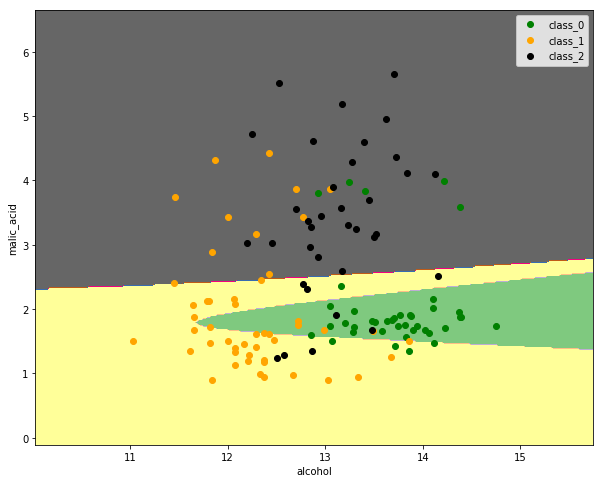

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,8)

n_classes = 3
plot_colors = ['green', 'orange', 'black']
plot_step = 0.02


x_min, x_max = x_train[:, 0].min() - 1, x_train[:,0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:,1].max() + 1
xx, yy = torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                       torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(
  torch.cat([xx.reshape(-1,1), yy.reshape(-1,1)], dim = 1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx,yy,preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
  indexes = np.where(y_train == i)
  plt.scatter(x_train[indexes, 0], x_train[indexes, 1], c = color, label = wine.target_names[i], cmap='Accept')
  plt.xlabel(wine.feature_names[0])
  plt.ylabel(wine.feature_names[1])
  print(x_train[indexes, 0])
  plt.legend()